In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# URL directe de la ressource 
url = "https://www.data.gouv.fr/fr/datasets/r/8debb975-02da-4bfc-808f-42d18ad76d0b"

# Lecture du fichier avec pandas
df = pd.read_csv(url, sep=';', dtype=str)  # sep=';' est courant sur data.gouv.fr

# Aperçu du dataframe
df.head(20)

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
0,01,84,2016,Homicides,Victime,5,"0,0078318",638425,2016,308491,2016
1,02,32,2016,Homicides,Victime,10,"0,0186520",536136,2016,264180,2016
2,03,84,2016,Homicides,Victime,4,"0,0117861",339384,2016,206980,2016
3,04,93,2016,Homicides,Victime,2,"0,0123028",162565,2016,126760,2016
4,05,93,2016,Homicides,Victime,0,"0,0000000",141107,2016,134647,2016
5,06,93,2016,Homicides,Victime,97,"0,0895078",1083704,2016,761857,2016
6,07,84,2016,Homicides,Victime,5,"0,0153772",325157,2016,201264,2016
7,08,44,2016,Homicides,Victime,5,"0,0181573",275371,2016,142010,2016
8,09,76,2016,Homicides,Victime,1,"0,0065331",153067,2016,108589,2016
9,10,44,2016,Homicides,Victime,6,"0,0194231",308910,2016,163064,2016


In [4]:
# Type des colonnes de la base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16362 entries, 0 to 16361
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Code_departement     16362 non-null  object
 1   Code_region          16362 non-null  object
 2   annee                16362 non-null  object
 3   indicateur           16362 non-null  object
 4   unite_de_compte      16362 non-null  object
 5   nombre               16362 non-null  object
 6   taux_pour_mille      16362 non-null  object
 7   insee_pop            16362 non-null  object
 8   insee_pop_millesime  16362 non-null  object
 9   insee_log            16362 non-null  object
 10  insee_log_millesime  16362 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


# Analyse exploratoire de la base de données

<Figure size 1600x800 with 0 Axes>

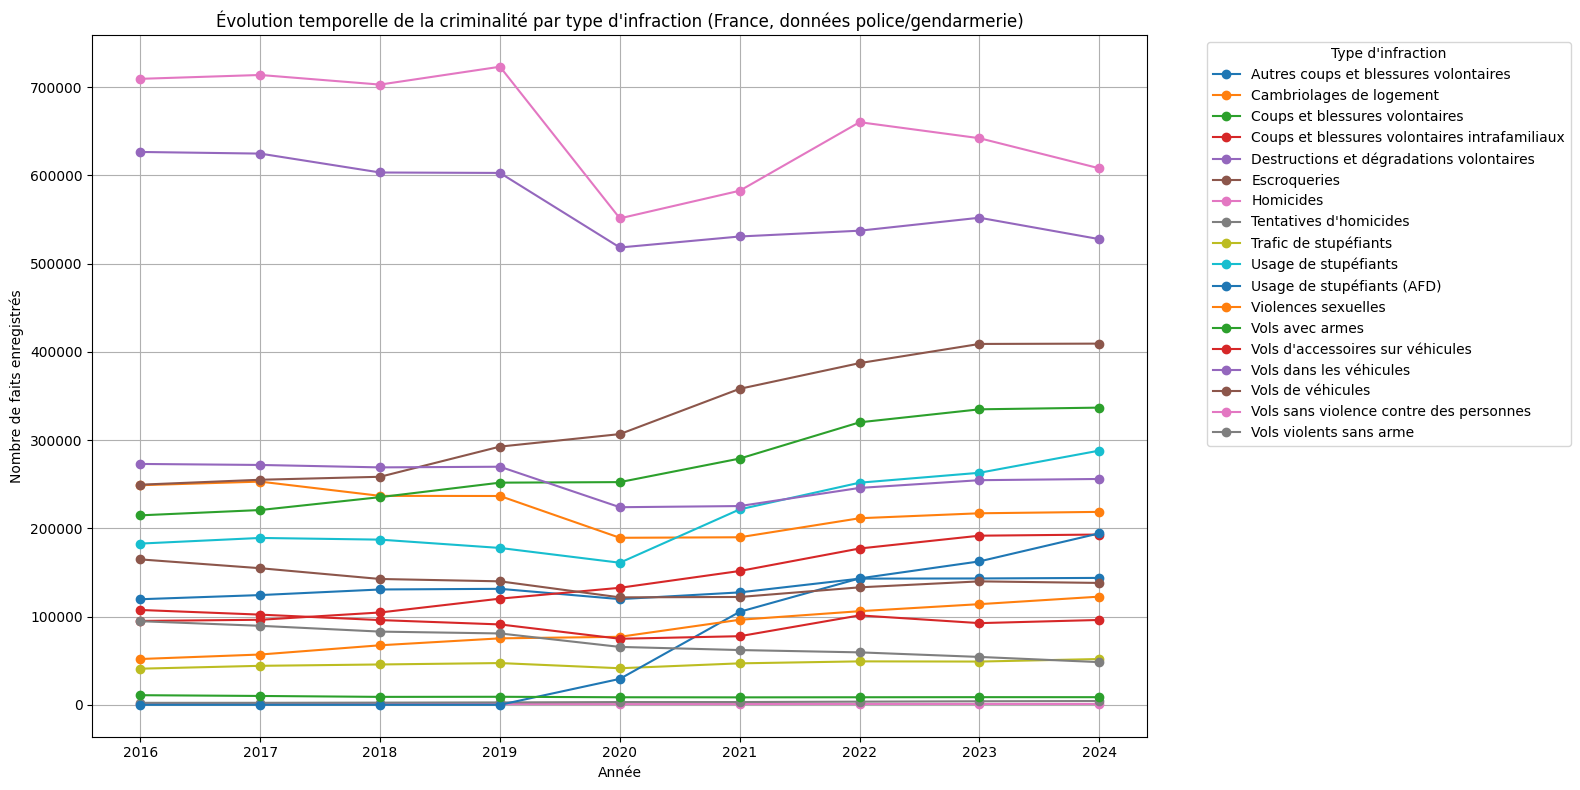

In [ ]:
# On transforme les colonnes en numeric
# ------------------------------------
df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
df['nombre'] = pd.to_numeric(df['nombre'], errors='coerce')

# ------------------------------------
# Agrégation par année et type d’infraction
# ------------------------------------

df_grouped = (
    df.groupby(['annee', 'indicateur'])['nombre']
      .sum()
      .reset_index()
)

df_pivot = df_grouped.pivot(
    index='annee',
    columns='indicateur',
    values='nombre'
)

# ------------------------------------
# Graphique
# ------------------------------------

plt.figure(figsize=(16, 8))

df_pivot.plot(marker='o', figsize=(16, 8))

plt.title("Évolution temporelle de la criminalité par type d'infraction (France, données police/gendarmerie)")
plt.xlabel("Année")
plt.ylabel("Nombre de faits enregistrés")
plt.grid(True)

plt.legend(title="Type d'infraction", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Evolution pour les 8 crimes les plus frequents sur la période


<Figure size 1600x800 with 0 Axes>

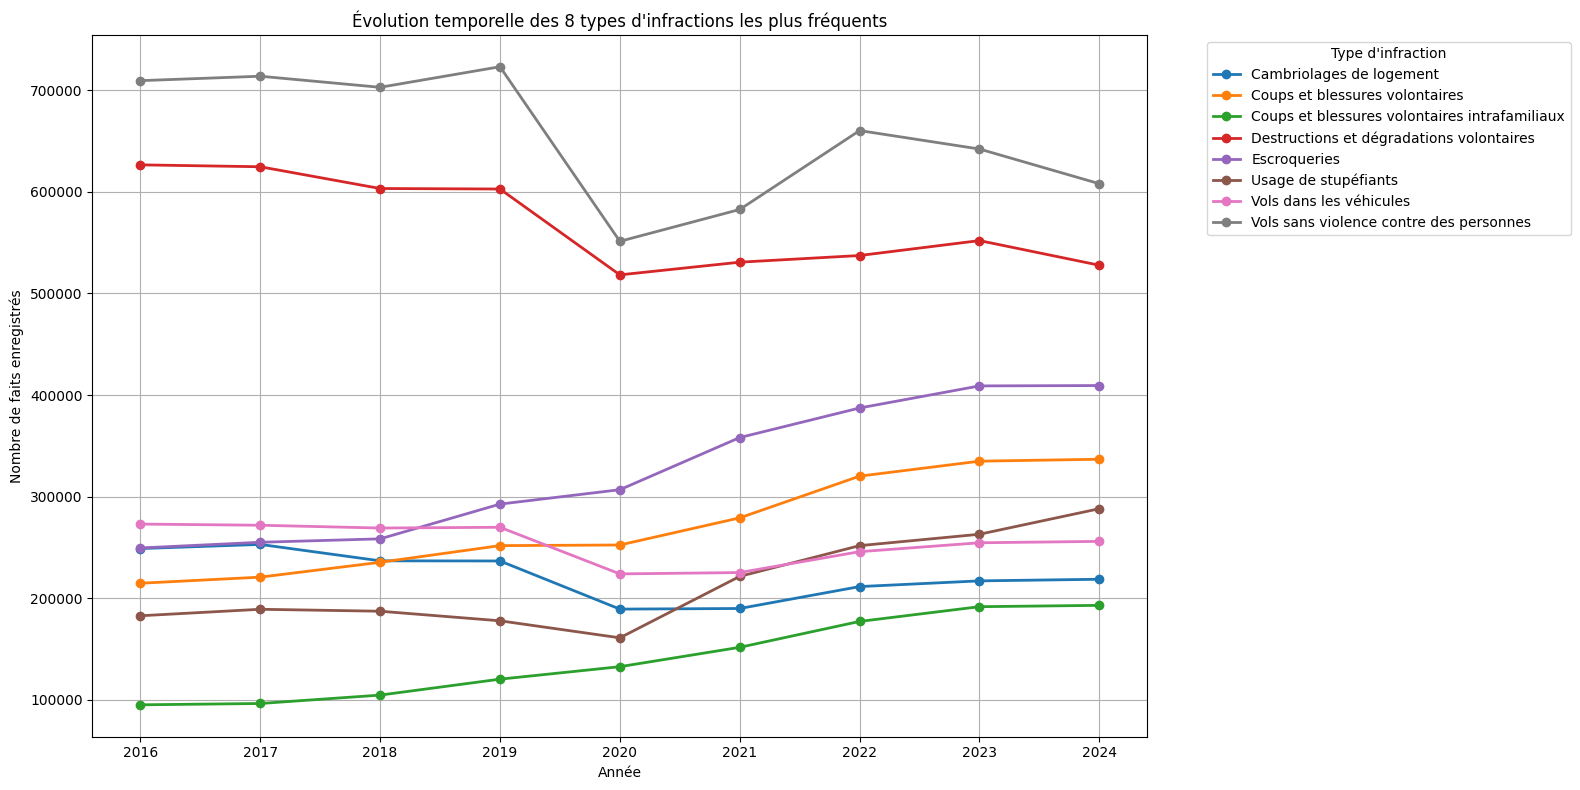

In [ ]:
mean_counts = (
    df.groupby('indicateur')['nombre']
      .mean()
      .sort_values(ascending=False)
)

top8_indicateurs = mean_counts.head(8).index.tolist()

# Filtrer uniquement les 8 plus fréquents
df_top8 = df[df['indicateur'].isin(top8_indicateurs)]

# -------------------------------
# Agrégation par année et indicateur
# -------------------------------
df_grouped8 = (
    df_top8.groupby(['annee', 'indicateur'])['nombre']
            .sum()
            .reset_index()
)

df_pivot = df_grouped8.pivot(
    index='annee',
    columns='indicateur',
    values='nombre'
)

# -------------------------------
# Graphique
# -------------------------------
plt.figure(figsize=(16, 8))
df_pivot.plot(marker='o', linewidth=2, figsize=(16, 8))

plt.title("Évolution temporelle des 8 types d'infractions les plus fréquents")
plt.xlabel("Année")
plt.ylabel("Nombre de faits enregistrés")
plt.grid(True)
plt.legend(title="Type d'infraction", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Evolution relative des differents crimes

<Figure size 1600x800 with 0 Axes>

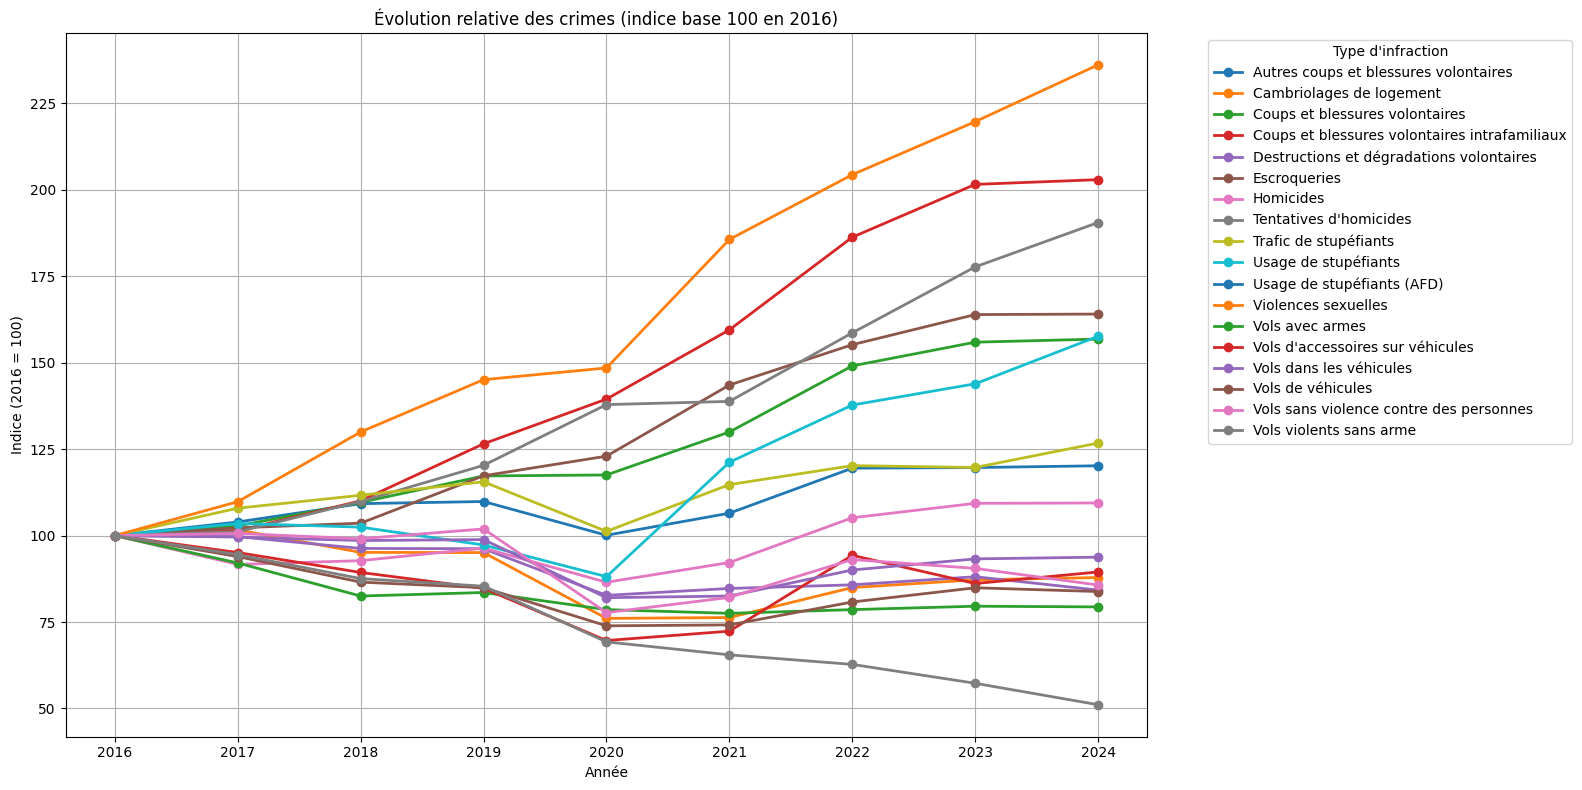

In [7]:
df_pivot = df_grouped.pivot(
    index='annee',
    columns='indicateur',
    values='nombre'
)
# ------------------------------------
# 4. Calcul de l'indice base 100 en 2016
# ------------------------------------
base_year = 2016
base_values = df_pivot.loc[base_year]

df_index = (df_pivot / base_values) * 100

# ------------------------------------
# 5. Graphique de l’évolution relative
# ------------------------------------
plt.figure(figsize=(16, 8))
df_index.plot(marker='o', linewidth=2, figsize=(16, 8))

plt.title("Évolution relative des crimes (indice base 100 en 2016)")
plt.xlabel("Année")
plt.ylabel("Indice (2016 = 100)")
plt.grid(True)
plt.legend(title="Type d'infraction", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##### Evolution relative des crimes qui ont le plus varié


Crimes les plus volatils : ['Violences sexuelles', 'Coups et blessures volontaires intrafamiliaux', "Tentatives d'homicides", 'Usage de stupéfiants', 'Escroqueries', 'Coups et blessures volontaires', 'Vols violents sans arme', "Vols d'accessoires sur véhicules"]


<Figure size 1600x800 with 0 Axes>

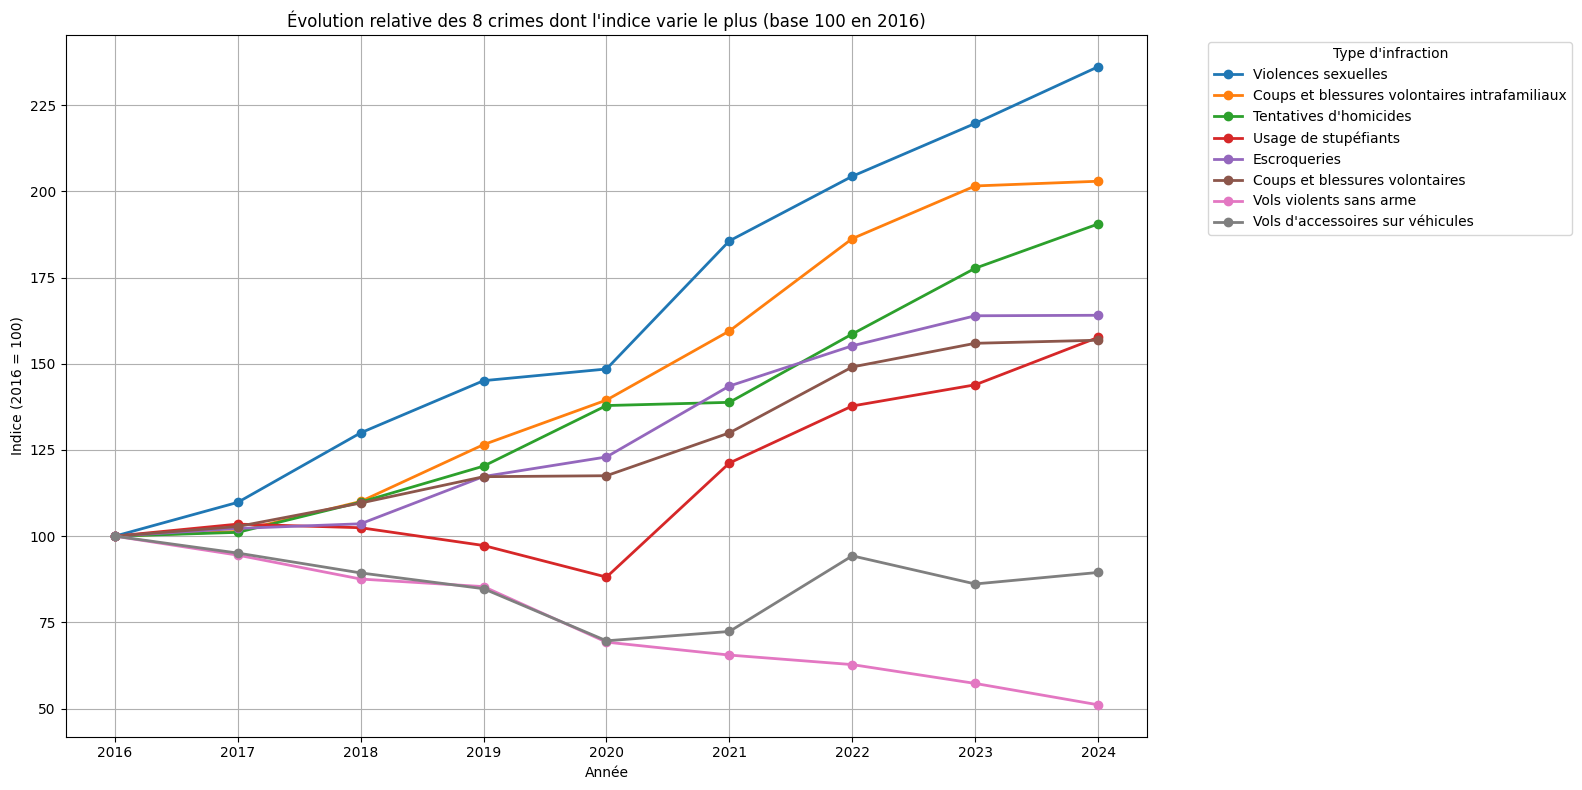

In [8]:
variation = df_index.max() - df_index.min()
top8_var = variation.sort_values(ascending=False).head(8).index.tolist()

print("Crimes les plus volatils :", top8_var)

df_index_top8 = df_index[top8_var]

# ------------------------------------------------------
# 5. Graphique : variation des 8 crimes les plus volatils
# ------------------------------------------------------
plt.figure(figsize=(16, 8))
df_index_top8.plot(marker='o', linewidth=2, figsize=(16, 8))

plt.title("Évolution relative des 8 crimes dont l'indice varie le plus (base 100 en 2016)")
plt.xlabel("Année")
plt.ylabel("Indice (2016 = 100)")
plt.grid(True)
plt.legend(title="Type d'infraction", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Prendre les plus gros crimes et les regrouper, puis effectuer des regressions

In [14]:
df[df["annee"] == 2019][["Code_departement","annee","taux_pour_mille"]]

,Code_departement,annee,taux_pour_mille
303,01,2019,"0,0061309"
304,02,2019,"0,0094101"
305,03,2019,"0,0089292"
306,04,2019,"0,0000000"
307,05,2019,"0,0141623"
...,...,...,...
15852,971,2019,"3,5967197"
15853,972,2019,"2,2084563"
15854,973,2019,"2,1549429"
15855,974,2019,"2,0807933"
